<a href="https://colab.research.google.com/github/Dinarque/INALCO_Inalco_M2_langage_de_scripts_2024_eleves/blob/main/TP/TP1_de_Flaubert_a_FlauBERT_eleves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP1 : De Flaubert à FlauBERT**


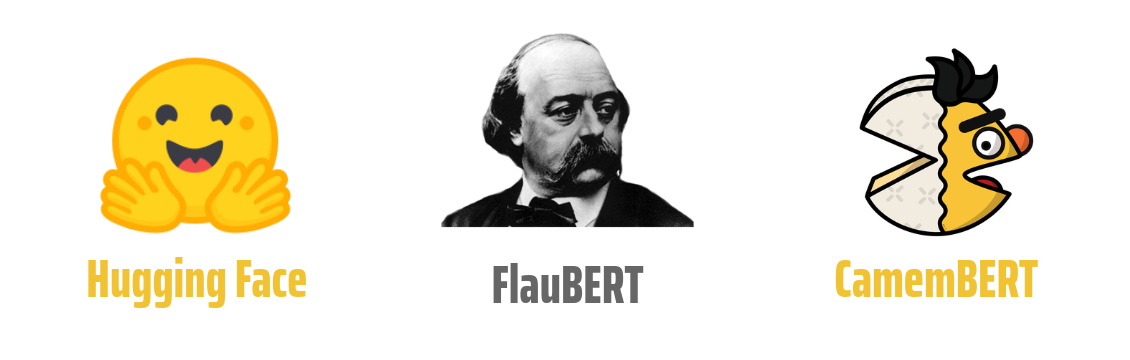

Quelques révisions du programme de première année, et au delà !

**Objectifs : **

1) Réviser les fondamentaux de l'écriture de scripts en python (structures de données et bonnes pratiques), et notamment:
* le téléchargement et l'ouverture de fichiers
* les fonctions essentielles de nettoyage du texte
* le stockage des informations pertinentes dans des structures de données adaptées

2) Savoir comment utiliser python pour répondre à des questions pratiques sur des données. Savoir réfléchir à la manière de découper une question abstraite (Ex: quel est le vocabulaire particulier de Flaubert par rapport aux autres romanciers du 19ième siècle ?) en une liste d'instructions que vous pouvez coder pour obtenir la réponse

3) Etudier (informatiquement) le style de Flaubert, car c'est un des meilleurs auteurs qui soient

# 1) préliminaires pour accéder à l'Education Sentimentale

Pour commencer par le commencement, il faut charger les textes de Flaubert.

In [2]:
flaubert = {
    "Madame_Bovary": "https://www.gutenberg.org/cache/epub/14155/pg14155.txt",
    "L_Education_sentimentale": "https://www.gutenberg.org/cache/epub/49773/pg49773.txt",
    "Bouvard_et_Pecuchet": "https://www.gutenberg.org/cache/epub/66505/pg66505.txt",
    "Trois_Contes": "https://www.gutenberg.org/cache/epub/12065/pg12065.txt",
    "Salammbô": "https://www.gutenberg.org/cache/epub/48881/pg48881.txt",
    "Un_Coeur_simple": "https://www.gutenberg.org/cache/epub/26812/pg26812.txt",
    "Dictionnaire_des_idees_recues": "https://www.gutenberg.org/cache/epub/14156/pg14156.txt"
}

* Pour ne pas poluer l'onglet du notebook, créez (en codant !!) un répertoire nommé "romans_Flaubert" dans le notebook

In [18]:
!mkdir romans_Flaubert

mkdir: romans_Flaubert: File exists


* Faites la même chose en python en utilisant la librairie os

* Téléchargez-y en utilisant la librairie urllib le texte de l'Education Sentimentale puis en utilisant la librairie os, saubegardez le roman dans le dossier que vous avez créé

* Transformez votre série d'instructions en fonction (qui prend en entrée le nom d'un roman) et téléchargez tous le corpus

* écrire une fonction  qui prend en entrée le nom d'un roman et renvoie le texte du roman stocké dans le fichier. La tester sur l'ES et afficher les 500 premières lignes

The Project Gutenberg eBook of OEuvres completes de Gustave Flaubert, tome 3: L'education sentimentale, v. 1
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of th


# 2) Nettoyer l'oeuvre du maître

Le texte que nous avons téléchargé n'est pas de la meilleure qualité. Comme vous le voyez on tombe sur un passage en anglais...  Réglons cela !


* Vérifiez que le texte était bien en encodage UTF-8 (vous pouvez utiliser la librairie chardet)

In [4]:
!pip install chardet 


{'Madame_Bovary': 'ascii',
 'L_Education_sentimentale': 'ascii',
 'Bouvard_et_Pecuchet': 'ascii',
 'Trois_Contes': 'ascii',
 'Salammbô': 'ascii',
 'Un_Coeur_simple': 'ascii',
 'Dictionnaire_des_idees_recues': 'ascii'}

* Enlevez tous les caractères spéciaux (ne conserver que les caractères latins). Quelle librairie pourrait le faire le plus facilement ?



In [25]:
!pip install unidecode

* Enlevez tous les contenus textuels qui ne sont pas l'oeuvre de Flaubert (vous pouvez garder les préfaces, que vous encoderez le cas échéant avec la clé "preface" dans la question suivante).
Indice : ils sont en anglais !

In [15]:
!pip install nltk langdetect

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.9.11-cp312-cp312-macosx_11_0_arm64.whl.metadata (40 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.9.11-cp312-cp312-macosx_11_0_arm64.whl (284 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)


Fichier nettoyé sauvegardé sous nettoye_Bouvard_et_Pecuchet.txt
Fichier nettoyé sauvegardé sous nettoye_L_Education_sentimentale.txt
Fichier nettoyé sauvegardé sous nettoye_Madame_Bovary.txt
Fichier nettoyé sauvegardé sous nettoye_Salammbô.txt
Fichier nettoyé sauvegardé sous nettoye_Dictionnaire_des_idees_recues.txt
Fichier nettoyé sauvegardé sous nettoye_Trois_Contes.txt
Fichier nettoyé sauvegardé sous nettoye_Un_Coeur_simple.txt


# 3) Organiser l'oeuvre

L'objectif de cette partie sera de stocker de manière efficace toute l'oeuvre de Flaubert dans la variable "oeuvre_Flaubert" : un dictionnaire de dictionnaires ayant comme clé le titre du livre (sans accent) et en valeur un dictionnaire ayant comme clé le numéro de chapitre (un chiffre romain) et retournant le texte de ce chapitre.

Remarquez que chaque chapitre est noté par un chiffre romain et est précédé et suivi de deux sauts de ligne.


* écrivez une fonction prenant en entrée le texte d'un roman et effectuant un split sur les séquences du type deux sauts de ligne, une ligne avec du texte, deux sauts de ligne, et qui renvoie un dictionnaire associant la chaîne de caractère contenue entre les sauts de ligne et lui associe le texte avant la prochaine séparation


In [10]:
!pip install unicode 

Livre : nettoye_Bouvard_et_Pecuchet
  Chapitre : I
  Contenu du chapitre (extrait) : Comme il faisait une chaleur de trente-trois degres, le boulevard
Bourdon se trouvait absolument des...
  Chapitre : II
  Contenu du chapitre (extrait) : Quelle joie, le lendemain, en se reveillant! Bouvard fuma une pipe
et Pecuchet huma une prise, qu'il...
  Chapitre : III
  Contenu du chapitre (extrait) : Pour savoir la chimie, ils se procurerent le cours de Regnault et
apprirent d'abord que _les corps s...
  Chapitre : IV
  Contenu du chapitre (extrait) : Six mois plus tard, ils etaient devenus des archeologues, et leur
maison ressemblait a un musee.

Un...
  Chapitre : V
  Contenu du chapitre (extrait) : Ils lurent d'abord Walter Scott.

Ce fut comme la surprise d'un monde nouveau.

Les hommes du passe ...
  Chapitre : VI
  Contenu du chapitre (extrait) : Dans la matinee du 25 fevrier 1848, on apprit a Chavignolles, par un
individu venant de Falaise, que...
  Chapitre : VII
  Contenu du chapitre (e

* à votre avis, faut-il mieux utiliser la fonction qui enlève l'anglais avant de procéder au découpage par chapitre ou après sur chaque chapire ? Pourquoi ? Essayez les deux et commentez les résultats

cela peut dépendre des librairies utilisées mais je penses qu'il est préférable de faire un découpage par chapitre avant de faire le nettoyage car j'ai pu remarquer qu'avec certaines librairies les sauts de lignes ainsi et la mise en forme générale des fichiers d'entrées sont perturbées rendant ainsi compliqué le découpage et le travaille compliqué sur ses dernier. En effet difficile d'établir des règles pour repérer les chapitre lorsqu'il n'y en à pas ....

* Pour le dictionnaire des idées reçues, puisque c'est déjà un  dictionnaire dans la forme, stockez-le dans un dictionnaire qui associe à chaque mot sa  définition

Repérez que les mots définis sont en lettres capitales.
Regardez comment se structure le texte et écrivez une fonction pour traiter le dictionnaire spécifiquement

In [16]:
import re

def extraire_definitions_dictionnaire(texte):
    pattern = r'([A-ZÉÈÀÇÂÊÎÔÛÄËÏÖÜ]+):' 
    sections = re.split(pattern, texte)
    
    dictionnaire = {}
    
    for i in range(1, len(sections) - 1, 2):
        mot = sections[i].strip()
        definition = sections[i + 1].strip()
        dictionnaire[mot] = definition
    
    return dictionnaire

def creer_dictionnaire_des_idees_recues(fichier):
    with open(fichier, 'r', encoding='utf-8') as f:
        texte = f.read()
    
    dictionnaire_idees_recues = extraire_definitions_dictionnaire(texte)
    return dictionnaire_idees_recues

fichier = '/Users/anissa/Documents/M2/script_tp1/romans_Flaubert/nettoye_Dictionnaire_des_idees_recues.txt'

dictionnaire_idees_recues = creer_dictionnaire_des_idees_recues(fichier)

for mot, definition in list(dictionnaire_idees_recues.items())[:10]:
    print(f"{mot} : {definition[:100]}...")

ABELARD : Inutile d'avoir la moindre idee de sa philosophie, ni
meme de connaitre le titre de ses ouvrages. Fa...
ABRICOTS : Nous n'en aurons pas encore cette annee....
ABSALON : S'il eut porte perruque, Joab n'aurait pu le tuer. Nom
facetieux a donner a un ami chauve....
ABSINTHE : Poison extra-violent: un verre et vous etes mort. Les
journalistes en boivent pendant qu'ils ecriven...
FRANCAISE : Toujours prononcer furia francese....
ACCIDENT : Toujours deplorable ou facheux (comme si on devait
jamais trouver un malheur une chose rejouissante....
ACCOUCHEMENT : Mot a eviter; le remplacer par evenement. <<Pour
quelle epoque attendez-vous l'evenement?>>...
ACHILLE : Ajouter <<aux pieds legers>>; cela donne a croire qu'on a
lu Homere....
ACTRICES : La perte des fils de famille. Sont d'une lubricite
effrayante, se livrent a des orgies, avalent des ...
ADIEUX : Mettre des larmes dans sa voix en parlant des adieux de
Fontainebleau....


* écrivez un code qui traite tout le corpus

In [1]:
import urllib.request
import os
import re
from unidecode import unidecode
from langdetect import detect

def telecharger_texte(url):
    response = urllib.request.urlopen(url)
    texte = response.read().decode('utf-8')
    return texte

def creer_dossier(nom_dossier):
    if not os.path.exists(nom_dossier):
        os.makedirs(nom_dossier)

def sauvegarder_texte(texte, chemin_fichier):
    with open(chemin_fichier, "w", encoding="utf-8") as f:
        f.write(texte)

def creation_corpus(url, nom_dossier, nom_fichier):
    texte = telecharger_texte(url)
    creer_dossier(nom_dossier)
    chemin_fichier = os.path.join(nom_dossier, nom_fichier)
    sauvegarder_texte(texte, chemin_fichier)
    print(f"Le texte a été sauvegardé dans : {chemin_fichier}")

def load_text(nom_dossier, fichiers):
    corpus = {}
    for nom_fichier in fichiers:
        chemin_fichier = os.path.join(nom_dossier, nom_fichier)
        with open(chemin_fichier, 'r', encoding='utf-8') as f:
            texte = f.read()
            titre = os.path.splitext(nom_fichier)[0].replace('_', ' ')
            corpus[titre] = texte
    return corpus

def remove_english_content(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    filtered_text = []
    preface = []
    for sentence in sentences:
        try:
            lang = detect(sentence)
            if lang == 'fr':
                filtered_text.append(sentence)
            elif lang == 'en':
                preface.append(sentence)
        except:
            continue
    return ' '.join(filtered_text), ' '.join(preface)

def split_chapters_and_parts(text):
    partie_pattern = r'(PREMIERE PARTIE|DEUXIEME PARTIE|TROISIEME PARTIE)\n+'
    chapitre_pattern = r'(CHAPITRE\s+[IVXLCDM]+|[IVXLCDM]+)\n+'
    parts = re.split(partie_pattern, text)
    chapters = {}
    current_part = None
    for i in range(len(parts)):
        if i % 2 == 1:
            current_part = parts[i].strip()
        else:
            part_text = parts[i].strip()
            chapter_parts = re.split(chapitre_pattern, part_text)
            for j in range(1, len(chapter_parts), 2):
                chapitre = chapter_parts[j].strip()
                texte_chapitre = chapter_parts[j + 1].strip()
                if current_part:
                    chapter_key = f"{current_part} - {chapitre}"
                else:
                    chapter_key = f"{chapitre}"
                chapters[chapter_key] = texte_chapitre
    return chapters

def remove_special_characters_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    cleaned_text = unidecode(text)
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(cleaned_text)

def traiter_corpus(nom_dossier, fichiers):
    corpus = load_text(nom_dossier, fichiers)
    oeuvre_Flaubert = {}
    for titre, texte in corpus.items():
        filtered_text, preface = remove_english_content(texte)
        chapters = split_chapters_and_parts(filtered_text)
        if preface:
            chapters['preface'] = preface
        oeuvre_Flaubert[titre] = chapters
    return oeuvre_Flaubert

def parse_dictionnaire(text):
    pattern = r'([A-ZÉÈÊÀÛÄÏÇ ]+):?\s(.*?)(?=\n[A-ZÉÈÊÀÛÄÏÇ ]+:\s|\n\n|$)'
    matches = re.findall(pattern, text, re.DOTALL)
    dico = {}
    for match in matches:
        word = match[0].strip()
        definition = match[1].strip().replace('\n', ' ')
        dico[word] = definition
    return dico

def extraire_definitions_dictionnaire(texte):
    pattern = r'([A-ZÉÈÀÇÂÊÎÔÛÄËÏÖÜ]+):' 
    sections = re.split(pattern, texte)
    
    dictionnaire = {}
    
    for i in range(1, len(sections) - 1, 2):
        mot = sections[i].strip()
        definition = sections[i + 1].strip()
        dictionnaire[mot] = definition
    
    return dictionnaire

def creer_dictionnaire_des_idees_recues(fichier):
    with open(fichier, 'r', encoding='utf-8') as f:
        texte = f.read()
    
    dictionnaire_idees_recues = extraire_definitions_dictionnaire(texte)
    return dictionnaire_idees_recues

creation_corpus("https://www.gutenberg.org/cache/epub/14155/pg14155.txt", "romans_Flaubert", "Madame_Bovary.txt")
creation_corpus("https://www.gutenberg.org/cache/epub/14157/pg14157.txt", "romans_Flaubert", "Bouvard_et_Pecuchet.txt")
creation_corpus("https://www.gutenberg.org/cache/epub/48881/pg48881.txt", "romans_Flaubert", "Salammbô.txt")
creation_corpus("https://www.gutenberg.org/cache/epub/12065/pg12065.txt", "romans_Flaubert", "Trois_Contes.txt")
creation_corpus("https://www.gutenberg.org/cache/epub/26812/pg26812.txt", "romans_Flaubert", "Un_Coeur_simple.txt")
creation_corpus("https://www.gutenberg.org/cache/epub/49773/pg49773.txt", "romans_Flaubert", "Education_Sentimentale.txt")

fichiers = [
    "Madame_Bovary.txt",
    "Education_Sentimentale.txt",
    "Bouvard_et_Pecuchet.txt",
    "Salammbô.txt",
    "Trois_Contes.txt",
    "Un_Coeur_simple.txt"
]

for fichier in fichiers:
    remove_special_characters_from_file(f"romans_Flaubert/{fichier}")

nom_dossier = "./romans_Flaubert"

oeuvre_Flaubert = traiter_corpus(nom_dossier, fichiers)

print("Madame Bovary :", list(oeuvre_Flaubert["Madame Bovary"].items())[:5])

with open('/Users/anissa/Documents/M2/script_tp1/romans_Flaubert/nettoye_Dictionnaire_des_idees_recues.txt', encoding='utf-8') as f:
    dico_text = f.read()
dico_idees_recues = parse_dictionnaire(dico_text)

print(dico_idees_recues.keys())

fichier = '/Users/anissa/Documents/M2/script_tp1/romans_Flaubert/nettoye_Dictionnaire_des_idees_recues.txt'
dictionnaire_idees_recues = creer_dictionnaire_des_idees_recues(fichier)

for mot, definition in list(dictionnaire_idees_recues.items())[:10]:
    print(f"{mot} : {definition[:100]}...")

Le texte a été sauvegardé dans : romans_Flaubert/Madame_Bovary.txt
Le texte a été sauvegardé dans : romans_Flaubert/Bouvard_et_Pecuchet.txt
Le texte a été sauvegardé dans : romans_Flaubert/Salammbô.txt
Le texte a été sauvegardé dans : romans_Flaubert/Trois_Contes.txt
Le texte a été sauvegardé dans : romans_Flaubert/Un_Coeur_simple.txt
Le texte a été sauvegardé dans : romans_Flaubert/Education_Sentimentale.txt
Madame Bovary : [('PREMIERE PARTIE - I', "Nous etions a l'Etude, quand le Proviseur entra, suivi d'un\nnouveau habille en bourgeois et d'un garcon de classe qui portait\nun grand pupitre. Ceux qui dormaient se reveillerent, et chacun se\nleva comme surpris dans son travail.\n\nLe Proviseur nous fit signe de nous rasseoir; puis, se tournant\nvers le maitre d'etudes:\n\n-- Monsieur Roger, lui dit-il a demi-voix, voici un eleve que je\nvous recommande, il entre en cinquieme. Si son travail et sa\nconduite sont meritoires, il passera dans les grands, ou l'appelle\nson age.\n\nReste da

In [14]:
def creer_gros_dictionnaire(oeuvre_Flaubert, dictionnaire_idees_recues):
    gros_dictionnaire = {}

    for titre, chapitres in oeuvre_Flaubert.items():
        gros_dictionnaire[titre] = chapitres

    gros_dictionnaire["Dictionnaire des idées reçues"] = dictionnaire_idees_recues

    return gros_dictionnaire

fichier_idees_recues = '/Users/anissa/Documents/M2/script_tp1/romans_Flaubert/nettoye_Dictionnaire_des_idees_recues.txt'
dictionnaire_idees_recues = creer_dictionnaire_des_idees_recues(fichier_idees_recues)

gros_dictionnaire = creer_gros_dictionnaire(oeuvre_Flaubert, dictionnaire_idees_recues)

print("Clés du gros dictionnaire :", gros_dictionnaire.keys())

print("\nExemple - Premiers chapitres de Madame Bovary :")
for chapitre, texte in list(gros_dictionnaire["Madame Bovary"].items())[:5]:
    print(f"{chapitre} : {texte[:100]}...")

print("\nExemple - Quelques entrées du Dictionnaire des idées reçues :")
for mot, definition in list(gros_dictionnaire["Dictionnaire des idées reçues"].items())[:10]:
    print(f"{mot} : {definition[:100]}...")

Clés du gros dictionnaire : dict_keys(['Madame Bovary', 'Education Sentimentale', 'Bouvard et Pecuchet', 'Salammbô', 'Trois Contes', 'Un Coeur simple', 'Dictionnaire des idées reçues'])

Exemple - Premiers chapitres de Madame Bovary :
PREMIERE PARTIE - I : Nous etions a l'Etude, quand le Proviseur entra, suivi d'un
nouveau habille en bourgeois et d'un gar...
PREMIERE PARTIE - II : Une nuit, vers onze heures, ils furent reveilles par le bruit d'un
cheval qui s'arreta juste a la po...
PREMIERE PARTIE - III : Un matin, le pere Rouault vint apporter a Charles le payement de
sa jambe remise: soixante et quinze...
PREMIERE PARTIE - IV : Les convies arriverent de bonne heure dans des voitures, carrioles
a un cheval, chars a bancs a deux...
PREMIERE PARTIE - V : La facade de briques etait juste a l'alignement de la rue, ou de
la route plutot. Derriere la porte ...

Exemple - Quelques entrées du Dictionnaire des idées reçues :
ABELARD : Inutile d'avoir la moindre idee de sa philosophie, ni
meme

* Pour vérifier que tout fonctionne bien, cherchez:
- la liste des textes stockés
- le chapitre 9 de Madame Bovary
- le texte d'un Coeur Simple
- la définition du mot "introduction" dans le Dictionnaire des idées reçues.

In [21]:
gros_dictionnaire.keys()

dict_keys(['Madame Bovary', 'Education Sentimentale', 'Bouvard et Pecuchet', 'Salammbô', 'Trois Contes', 'Un Coeur simple', 'Dictionnaire des idées reçues'])

In [22]:
gros_dictionnaire["Madame Bovary"]["PREMIERE PARTIE - IX"]

"Souvent, lorsque Charles etait sorti, elle allait prendre dans\nl'armoire, entre les plis du linge ou elle l'avait laisse, le\nporte-cigares en soie verte.\n\nElle le regardait, l'ouvrait, et meme elle flairait l'odeur de sa\ndoublure, melee de verveine et de tabac. A qui appartenait-il?...\nAu Vicomte. C'etait peut-etre un cadeau de sa maitresse. On avait\nbrode cela sur quelque metier de palissandre, meuble mignon que\nl'on cachait a tous les yeux, qui avait occupe bien des heures et\nou s'etaient penchees les boucles molles de la travailleuse\npensive. Un souffle d'amour avait passe parmi les mailles du\ncanevas; chaque coup d'aiguille avait fixe la une esperance ou un\nsouvenir, et tous ces fils de soie entrelaces n'etaient que la\ncontinuite de la meme passion silencieuse. Et puis le Vicomte, un\nmatin, l'avait emporte avec lui. De quoi avait-on parle, lorsqu'il\nrestait sur les cheminees a large chambranle, entre les vases de\nfleurs et les pendules Pompadour? Elle etait a Toste

In [23]:
" ".join(gros_dictionnaire["Un Coeur simple"].values())

'(...)\n\n\nUN COEUR SIMPLE Pendant un demi-siecle, les bourgeoises de Pont l\'Eveque\nenvierent a Mme Aubain sa servante Felicite.\n\nPour cent francs par an, elle faisait la cuisine et le menage,\ncousait, lavait, repassait, savait brider un cheval,\nengraisser les volailles, battre le beurre, et resta fidele a\nsa maitresse, -- qui cependant n\'etait pas une personne\nagreable.\n\nElle avait epouse un beau garcon sans fortune, mort au\ncommencement de 1809, en lui laissant deux enfants tres jeunes\navec une quantite de dettes. Alors elle vendit ses immeubles,\nsauf la ferme de Toucques et la ferme de Geffosses, dont les\nrentes montaient a 5, 000 francs tout au plus, et elle quitta\nsa maison de Saint-Melaine pour en habiter une autre moins\ndispendieuse, ayant appartenu a ses ancetres et placee\nderriere les halles.\n\nCette maison, revetue d\'ardoises, se trouvait entre un passage\net une ruelle aboutissant a la riviere. Elle avait\ninterieurement des differences de niveau qui fai

In [25]:
gros_dictionnaire['Dictionnaire des idées reçues'].keys()

dict_keys(['ABELARD', 'ABRICOTS', 'ABSALON', 'ABSINTHE', 'FRANCAISE', 'ACCIDENT', 'ACCOUCHEMENT', 'ACHILLE', 'ACTRICES', 'ADIEUX', 'ADOLESCENT', 'AGENT', 'AGRICULTURE', 'AIL', 'AIR', 'AIRAIN', 'ALBATRE', 'ALBION', 'ALCIBIADE', 'ALCOOLISME', 'ALLEMAGNE', 'ALLEMANDS', 'AMBITIEUX', 'AMBITION', 'AMERIQUE', 'AMIRAL', 'ANDROCLES', 'ANGE', 'ANGLAIS', 'ANGLAISES', 'ANTECHRIST', 'APLOMB', 'ARBALETE', 'ARCHIMEDE', 'ARCHITECTES', 'ARCHITECTURE', 'ARGENT', 'ARMEE', 'ARSENIC', 'ART', 'ARTISTES', 'ASPIC', 'ASSASSIN', 'ASTRONOMIE', 'ATHEE', 'AUTEUR', 'AUTRUCHE', 'AVOCATS', 'BACCALAUREAT', 'BADAUD', 'BAGNOLET', 'BAGUE', 'BAILLEMENT', 'BAISER', 'BALLONS', 'BANDITS', 'BANQUET', 'BANQUIERS', 'BARAGOUIN', 'BARBE', 'BARBIER', 'BLEU', 'BASILIQUE', 'BASQUES', 'BATAILLE', 'BATON', 'BAUDRUCHE', 'BAYADERE', 'BEETHOVEN', 'BERGERS', 'BETES', 'BIBLE', 'BIBLIOTHEQUE', 'BIERE', 'BILLARD', 'BLONDES', 'BOIS', 'BONNES', 'GREC', 'BOSSUS', 'BOTTE', 'BOUCHERS', 'BOUDIN', 'BOUDDHISME', 'BOULET', 'BOURREAU', 'BOURSIERS', 'B

In [27]:
gros_dictionnaire["Dictionnaire des idées reçues"]['INTRODUCTION']

'Mot obscene.'

# 4) Des questions simples sur un Coeur Simple

* Quelle est l'oeuvre la plus longue de Flaubert ? La plus courte ? Leur longueur moyenne ?

In [29]:

fichiers = [
    './romans_Flaubert/nettoye_Bouvard_et_Pecuchet.txt',
    './romans_Flaubert/nettoye_Dictionnaire_des_idees_recues.txt',
    './romans_Flaubert/nettoye_Madame_Bovary.txt',
    './romans_Flaubert/nettoye_Salammbô.txt',
    './romans_Flaubert/nettoye_L_Education_sentimentale.txt',
    './romans_Flaubert/nettoye_Trois_Contes.txt',
    './romans_Flaubert/nettoye_Un_Coeur_simple.txt'
]

def mesurer_longueur(fichiers):
    longueurs = {}
    for fichier in fichiers:
        with open(fichier, 'r', encoding='utf-8') as f:
            texte = f.read()
            titre = os.path.basename(fichier).replace('nettoye_', '').replace('.txt', '')
            longueurs[titre] = len(texte)
    return longueurs

longueurs_oeuvres = mesurer_longueur(fichiers)

for titre, longueur in longueurs_oeuvres.items():
    print(f"{titre}: {longueur} caractères")

Bouvard_et_Pecuchet: 651951 caractères
Dictionnaire_des_idees_recues: 75062 caractères
Madame_Bovary: 685126 caractères
Salammbô: 677307 caractères
L_Education_sentimentale: 414950 caractères
Trois_Contes: 185342 caractères
Un_Coeur_simple: 68723 caractères


In [30]:
oeuvre_plus_longue = max(longueurs_oeuvres, key=longueurs_oeuvres.get)
oeuvre_plus_courte = min(longueurs_oeuvres, key=longueurs_oeuvres.get)
longueur_moyenne = sum(longueurs_oeuvres.values()) / len(longueurs_oeuvres)

print(f"Œuvre la plus longue : {oeuvre_plus_longue} avec {longueurs_oeuvres[oeuvre_plus_longue]} caractères")
print(f"Œuvre la plus courte : {oeuvre_plus_courte} avec {longueurs_oeuvres[oeuvre_plus_courte]} caractères")
print(f"Longueur moyenne des œuvres : {longueur_moyenne:.2f} caractères")

Œuvre la plus longue : Madame_Bovary avec 685126 caractères
Œuvre la plus courte : Un_Coeur_simple avec 68723 caractères
Longueur moyenne des œuvres : 394065.86 caractères


In [32]:
!pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.2 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [35]:
import pandas as pd

df_longueurs = pd.DataFrame(list(longueurs_oeuvres.items()), columns=['Titre', 'Longueur en caractères'])
df_longueurs.loc['Moyenne'] = ['Longueur moyenne', longueur_moyenne]
print(df_longueurs)


                                 Titre  Longueur en caractères
0                  Bouvard_et_Pecuchet           651951.000000
1        Dictionnaire_des_idees_recues            75062.000000
2                        Madame_Bovary           685126.000000
3                             Salammbô           677307.000000
4             L_Education_sentimentale           414950.000000
5                         Trois_Contes           185342.000000
6                      Un_Coeur_simple            68723.000000
Moyenne               Longueur moyenne           394065.857143


Quelle oeuvre comporte le plus de chapitre ? (On exclue bien sur le dictionnaire)

In [36]:
def oeuvre_avec_plus_de_chapitres(oeuvre_Flaubert):
    max_chapitres = 0
    oeuvre_max = ""

    for titre, chapitres in oeuvre_Flaubert.items():
        nombre_chapitres = sum(1 for cle in chapitres.keys() if cle.lower() != 'preface')
        
        if nombre_chapitres > max_chapitres:
            max_chapitres = nombre_chapitres
            oeuvre_max = titre

    return oeuvre_max, max_chapitres

oeuvre_max, max_chapitres = oeuvre_avec_plus_de_chapitres(oeuvre_Flaubert)

print(f"L'œuvre avec le plus grand nombre de chapitres est : {oeuvre_max} avec {max_chapitres} chapitres.")

L'œuvre avec le plus grand nombre de chapitres est : Madame Bovary avec 35 chapitres.


* Combien y-a-t-il de phrases fans "Un Coeur Simple" ?

In [37]:
def compter_phrases(texte):
    phrases = re.split(r'(?<=[.!?]) +', texte)
    return len(phrases)

titre_oeuvre = "Un Coeur simple"

if titre_oeuvre in oeuvre_Flaubert:
    texte_oeuvre = " ".join(oeuvre_Flaubert[titre_oeuvre].values())

    nombre_phrases = compter_phrases(texte_oeuvre)
    print(f"Le nombre de phrases dans '{titre_oeuvre}' est : {nombre_phrases}")
else:
    print(f"L'œuvre '{titre_oeuvre}' n'est pas trouvée dans le corpus.")

Le nombre de phrases dans 'Un Coeur simple' est : 482


* Combien-y-a-t-il de mots dans "Un Coeur Simple" ?

In [38]:
def compter_mots(texte):
    mots = re.findall(r'\b\w+\b', texte)
    return len(mots)

titre_oeuvre = "Un Coeur simple"

if titre_oeuvre in oeuvre_Flaubert:
    texte_oeuvre = " ".join(oeuvre_Flaubert[titre_oeuvre].values())
    
    nombre_mots = compter_mots(texte_oeuvre)
    print(f"Le nombre de mots dans '{titre_oeuvre}' est : {nombre_mots}")
else:
    print(f"L'œuvre '{titre_oeuvre}' n'est pas trouvée dans le corpus.")

Le nombre de mots dans 'Un Coeur simple' est : 14922


* Et de mots uniques ?  Enlevez les mots les plus fréquents (les stopwords de nltk suffiront)

In [39]:
!pip install nltk

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anissa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

def compter_mots_uniques(texte, stop_words):

    mots = re.findall(r'\b\w+\b', texte.lower())  
    mots_sans_stopwords = [mot for mot in mots if mot not in stop_words]

    mots_uniques = set(mots_sans_stopwords)
    return len(mots_uniques)
titre_oeuvre = "Un Coeur simple"

if titre_oeuvre in oeuvre_Flaubert:
    texte_oeuvre = " ".join(oeuvre_Flaubert[titre_oeuvre].values())

    nombre_mots_uniques = compter_mots_uniques(texte_oeuvre, stop_words)
    print(f"Le nombre de mots uniques (sans stopwords) dans '{titre_oeuvre}' est : {nombre_mots_uniques}")
else:
    print(f"L'œuvre '{titre_oeuvre}' n'est pas trouvée dans le corpus.")

Le nombre de mots uniques (sans stopwords) dans 'Un Coeur simple' est : 3758


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anissa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Et de lemmes uniques ? ... Gardons ça pour la partie suivante

# 5) Lemmatisation sentimentale

* Récupérez le texte de l'Education sentimentale

In [50]:
education_sentimentale = ' '.join(oeuvre_Flaubert["Education Sentimentale"].values())

print(education_sentimentale[:100])


OEUVRES COMPLETES

  DE

  GUSTAVE FLAUBERT L'EDUCATION SENTIMENTALE PARIS

  A. QUANTIN, IMPRIMEUR-


* https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer Cette gentille personne a pris de son temps pour coder un lemmatiseur. Faites en sorte de le charger puis créer une fonction qui l'utilise et appliquez là à notre texte  

In [47]:
!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /private/var/folders/rv/q3kn90k92094c655lpzsxmv80000gn/T/pip-req-build-if_4amxs
  Running command git clone --filter=blob:none --quiet https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /private/var/folders/rv/q3kn90k92094c655lpzsxmv80000gn/T/pip-req-build-if_4amxs
  Resolved https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to commit bc0ebd0135a6cc78f48ddf184069b4c0b9c017d8
  Preparing metadata (setup.py) ... done
  Created wheel for FrenchLefffLemmatizer: filename=FrenchLefffLemmatizer-0.3-py3-none-any.whl size=3533514 sha256=7efb6aaa4a34e3f8bf82d737b25b74211ebdbd8a85fb34490d16facc3cdec173
  Stored in directory: /private/var/folders/rv/q3kn90k92094c655lpzsxmv80000gn/T/pip-ephem-wheel-cache-rwfyxgea/wheels/a0/fb/dc/96630205d93c8d4059f36f3e00d1ceb87ec1688a7f91871040
Successfully built FrenchLefffLemmatizer


* Etudiez les résultats de cette lemmatisation ? Qu'en pensez-vous ?
Essayez de lemmatiser quelques mots (indice : essayez des verbes conjugués)

* Oui, je suis d'accord, il faut aller chercher un autre lemmatiseur...
Prenons simplement celui fourni par Spacy, la librairie NLP à tout faire...




In [ ]:
!pip3 install spacy
!python3 -m spacy download fr_core_news_md

* Le pipeline de Spacy crée un objet token.  Quels sont ces champs ? Lequel devez-vous récupérer pour répondre à la question ?

* écrire une fonction prenant en entrée un texte et renvoyant la distribution des lemmes

* Commentez les premiers éléments de cette liste. Comment appelle-t-on ce genre de mots ? Que faire ? Modifiez la fonction en conséquence.



# 6) Les adjectifs d'Emma

Le but de cette question est de trouver tous les adjectifs utilisés par Flaubert pour décrire Mme Bovary.

* Chargez le texte de Mme Bovary

Quels sont tous les personnages principaux de l'oeuvre ? Indice : utiliser un système de NER
Quels sont tous les noms du personnage principal ? Commentez les résultats.
On ne fera pas mieux ce n'est pas l'essentiel.

* Trouvez maintenant tous les adjectifs qui sont utilisés pour décrire Madame Bovary.

(indice : utilisez un système de POS TAGGING)
(indice 2: sélectionnez les adjectifs et regardez leur tête)

In [ ]:
# Expérimentez avec le POS TAGGER de Spacy pour comprendre comment il fonctionne



* Analysez les résultats. Qu'en pensez-vous ?
écrivez une fonction qui parse un texte, sélectionne les adjectifs et retourne la liste des tuples contenant un adjectif et sa tête ? QUe constatez-vous ?

* Effectivement spacy ne donne pas de bons résultats. Utilisez le module de l'université de Stanford (stanza) et refaires le même travail

* Exécutez les deux fonctions sur Charles et Emma.
Que pouvez-vous dire des résultats ?

* Pensez un algorithme qui compare le résultat des deux systèmes, calcule un pourcentage de concordance et de discordances sur les têtes et renvoie la liste de réponses différentes. Bon exercice pour réviser les structures de données !

* Notre système ne renvoie que peu de réponses... ce qui est en fait logique. pourquoi ? Comment faire pour avoir la vraie réponse à notre question littéraire

* BONUS : Implémentez cette solution




* BONUS : proposez un protocole pour évaluer les différents systèmes sur notre tâche précise (repérer tous les adjectifs d'un texte et déterminer correctement leur tête) et uilisez-le pour évaluer les deux systèmes

# 7) spécificités du vocabulaire flaubertien

Le but de cette partie est d'étudier la spécificié du texte de flaubert par rapport à d'autres auteurs de la même époque.  Pour cela on va télécharger un corpus d'auteurs du XIX ième siècle.



* téléchargez le corpus CIDRE

https://www.ortolang.fr/market/corpora/cidre
https://github.com/oseminck/cidre/tree/main/CIDRE

écrivez une fonction qui charge tous les textes contenus dans chaque sous dossier de ce dossier dans un dossier nommé cidre. Affichez la liste des fichiers des textes qui sont là. comptez le nombre de texte. (en bash sinon ce n'est pas drôle)

In [ ]:
!mkdir cidre
!git clone https://github.com/oseminck/cidre.git
!cd cidre/CIDRE

Pour repérer le vocabulaire propre à Flaubert, nous allons:
* constituer un corpus 19 ieme siecle (liste de texte, chaque élément de la liste correspond à une oeuvre) et un corpus de Flaubert
* utiliser tf idf pour trouver les mots du corpus de Flaubert qui ne sont pas usuels dans l'autre

* écrivez une fonction qui parcourt le corpus cidre et renvoie un dictionnaire associant le nom du fichier txt au texte qu'il contient.



*  Créez un corpus global

* rensegnez vous sur le tf idf vectorizer de scikit learn et utilisez-le pour répondre à la question : quels sont les 100 mots les plus idiomatiques de Flaubert



Même question sur les verbes de Flaubert, et ses adjectifs

# 8) Une question de genre : Madame Bovary est-elle un roman féminin ?

L'article qui suit traite de la représentation du genre dans le roman français.

https://aclanthology.org/2022.jeptalnrecital-humanum.8.pdf

Il y aurait selon les auteurs des critères stylistiques permettant de déterminer si le roman a été écrit par un homme ou une femme, quitte à démasquer des pseudonymmes !

* Lisez l'article. Quels sont les caractéristiques stylistiques ou formels qui différencieraient un roman écrit par un homme d'un roman écrit par une femme selon les conclusions des auteurs.

* Nous nous intéresserons particulièrement à la section 4 intitulée  "Explorations textométriques : spécificités liées aux genres"
renseignez vous sur  l’indice de spécificité (SP) de Lafon.
Trouvez ou proposez une implémentation, et testez là sur un roman de Flaubert

In [ ]:
* Ne lemmatisez pas et ne retenez que les noms.
Vous semblent-t-ils a priori plus masculins ou féminins ?

* Utilisez un outil d'analyse morphologique pour étudier le genre des mots.
Calculez la proportion de mots masculins et féminins dans les romans de flaubert, et dans le corpus. La différence est-elle significative ?
Et dans Mme Bovary uniquement ?


* BONUS : Lisez la section 5 de l'article. Tentez de redémontrer la conclusion de l'article ": en moyenne, les
 romanciers et romancières mentionnent plus souvent les personnages de leur propre genre." Pour cela prenez au hasard un roman du corpus CIDRE écrit par un homme et un écrit par une femme, de longueur similaire

 Pour cela:
 * téléchargez le modèle disponible sur Ortolang
 * appliquez-le à Mme Bovary, à tout le corpus de Flaubert et tout le corpus.
 * recalculez le pourcentage de termes masculin, féminins et neutres
 * conclure

#9) FlauBERT : une introduction

C'est le moment de charger sur votre Notebook le Flaubert des temps modernes !

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://aclanthology.org/2020.jeptalnrecital-taln.26.pdf


* Consultez la documentation du site Hugging Face et chargez le tokenizer associé à Flaubert sur votre machine sur votre machine.
Tokenisez une phrase de Flaubert

In [ ]:
!pip install sacremoses

* Nous allons créer un mini moteur de recherche sémantique qui va nous servir à rechercher des phrases dans un texte.

Pour cela:
* écrivez une fonction qui transforme une phrase en vecteur avec FlauBERT
* écrivez une fonction qui prend en entrée un texte et renvoie un dictionnaire associant chaque phrase à son vecteur
* écrivez une fonction prenant en entrée un dictionnaire de ce type et une phrase et renvoie la phrase du texte la plus similaire (selon la métrique de cosine similarity)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('flaubert/flaubert_base_cased')
model = AutoModel.from_pretrained('flaubert/flaubert_base_cased')

* testez votre code sur le texte d'un coeur simple avec comme question "la mort du perroquet" et  "La calèche"

In [ ]:
p1 = "la mort du perroquet"
p2 = "perroquet joyeux"
p3 = "les médecins n'ont pas pu le sauver"

In [ ]:
chercher_la_phrase(p1,index)

In [ ]:
chercher_la_phrase(p2,index)

In [ ]:
chercher_la_phrase(p3,index)

* BONUS : modifier la fonction pour afficher les 5 meilleures phrases

* Proposez une stratégie pour deviner les synonymes des mots rares utilisés par Flaubert (cf question 8) en vous inspirant de l'index de phrases

# 10) Le gueuloir automatique

Flaubert avait l'habitude de lire ses textes à voix haute pour les retravailler.

Faites-vous plaisir et écoutez vous aussi la belle prose de ce génie.

* Allez sur le site Hugging Face et téléchargez le modèle de Speech-to-text (STT) de votre choix, puis utilisez-le pour écouter le sacrifice de Moloch (Salammbô" chapitre 9)

BONUS :
* Si le modèle que vous avez choisi vous le permet, faites en sorte qu'il "gueule" le texte

* Modifiez les paramètres pour que le modèle lise de façon drôlatique un passage de votre choix issu de Bouvard et Pécuchet

In [ ]:
!pip install --upgrade pip
!pip install --upgrade transformers scipy

* upload a model and write a function that creates an audio file from a text

* comme ça c'est vraiment long... activer le GPU pourrait aider :)